## Explore `sdf` output
`sdf` generates a large amount of information during fitting. Most of this is saved in a database that isn't visible on the web, and also in `pickle` files that can be found for each model under the "..." link.

A simpler output is the `json` files under the "model" link, there is less detail here, but they are sufficient for plotting.

To just explore the output you can probably avoid installing the `sdf` package.

In [11]:
import requests
import pickle
import matplotlib.pyplot as plt

%matplotlib inline

### json output
To explore json output we don't need any special packages. Either download directly with `requests`, or open with the `json` module.

In [2]:
r = requests.get('http://drgmk.com/sdb/seds/masters/'
                 'sdb-v2-132436.10-513016.1/public/sdb-v2-132436.10-513016.1-mnest/phoenix_m+modbb_disk_r_.json')

In [3]:
d = r.json()

In [4]:
for k in d.keys():
    print(k, type(d[k]))

id <class 'str'>
write_time <class 'float'>
model_comps <class 'list'>
main_results <class 'list'>
parameters <class 'list'>
best_params <class 'list'>
best_params_1sig <class 'list'>
chisq <class 'float'>
phot_band <class 'list'>
phot_wavelength <class 'list'>
phot_fnujy <class 'list'>
phot_e_fnujy <class 'list'>
phot_upperlim <class 'list'>
phot_ignore <class 'list'>
model_comp_fnujy <class 'list'>
model_comp_fnujy_1sig <class 'list'>
model_total_fnujy <class 'list'>
model_total_fnujy_1sig <class 'list'>
spectra <class 'list'>
model_spectra <class 'list'>
star_spec <class 'dict'>
disk_spec <class 'dict'>


The information contained in the json is largely related to the observational data, e.g. photometry and models in the observed bands.

There are also spectra for each model component.

### pickle output
To explore the pickle data we need the `pickle` package. There is a tonne of information saved here, including fluxes for the models in all bands known to `sdf`, and the distributions from which those fluxes were derived.

In [5]:
s = requests.get('http://drgmk.com/sdb/seds/masters/'
                 'sdb-v2-132436.10-513016.1/public/sdb-v2-132436.10-513016.1-mnest/phoenix_m+modbb_disk_r_.pkl')

In [6]:
r = pickle.loads(s.content)

 Config
  found files:
['/Users/grant/OneDrive - University of Warwick/astro/projects/sdf/sdf/sdf/sdf.conf', '/Users/grant/.sdf.conf']


In [7]:
# print the model component fluxes for the MIRI bands
print(f'filter: {r.model_comps}, total')
for i,f in enumerate(r.all_filters):
    if 'NIRCAM' in f:
        print(f, r.all_comp_phot[:,i], r.all_phot[i])

filter: ('phoenix_m', 'modbb_disk_r'), total
NIRCAM.F150W [2.22109445e+00 8.60775124e-13] 2.221094447749989
NIRCAM.F405N [4.01594920e-01 1.40014075e-05] 0.40198167554944675
NIRCAM.F323N [6.31433794e-01 1.26312939e-06] 0.6317069232068959
NIRCAM.F210M [1.34011356e+00 1.24097338e-09] 1.3401350156375142
NIRCAM.F150W2 [2.17495282e+00 5.98635641e-10] 2.174952827024812
NIRCAM.F212N [1.31526408e+00 1.37559908e-09] 1.3152641613019325
NIRCAM.F444W [3.62630394e-01 3.26510940e-05] 0.36313557963731585
NIRCAM.F322W2 [6.71735675e-01 2.77060541e-06] 0.6720221640384965
NIRCAM.F356W [5.33005881e-01 4.66155770e-06] 0.5332328992755784
NIRCAM.F410M [4.10606039e-01 1.54473350e-05] 0.4110874340632831
NIRCAM.F187N [1.53552901e+00 9.00804086e-11] 1.535569022033678
NIRCAM.F430M [3.76263767e-01 2.31840983e-05] 0.37671197243776405
NIRCAM.F277W [8.39318996e-01 2.22738045e-07] 0.8396218255902558
NIRCAM.F090W [3.97343074e+00 1.52916775e-13] 3.973430737704346
NIRCAM.F070W [4.76765032e+00 2.74223682e-13] 4.76765032083

In [8]:
# print the model component fluxes for the MIRI bands
print(f'filter: {r.model_comps}, total')
for i,f in enumerate(r.all_filters):
    if 'NIRCAM.F250MC' in f:
        print(f, r.all_comp_phot[:,i], r.all_phot[i])
        dist = r.distributions['all_phot'][i]

filter: ('phoenix_m', 'modbb_disk_r'), total
NIRCAM.F250MC [9.75595120e-01 4.81289731e-07] 0.9756140632298393


Text(0.5, 0, 'flux / Jy')

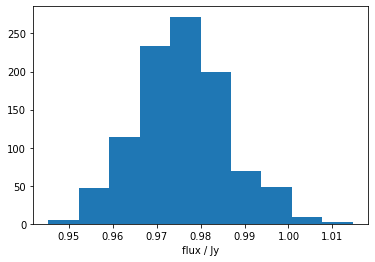

In [12]:
fig, ax = plt.subplots()
ax.hist(dist)
ax.set_xlabel('flux / Jy')